#DATA608 - Story 7: Where Do Strategic Minerals Come From?

The US Geological Survey publishes a list of Strategic Minerals (https://www.usgs.gov/news/national-news-release/us-geological-survey-releases-2022-list-critical-minerals). Having a secure supply of these minerals is essential to our security and economic prosperity. However many of these minerals are sourced from outside of the US. This assignment is to develop a reference catalog of the source or sources of each of these minerals and a judgement on the reliability of each source under stressed circumstance (e.g. war, economic crisis, etc.)

Notes:
- You will need to identify a source or sources for each of the minerals in the 2022 List of Critical Minerals

- You will need to categorize each source country as an ally, a competitor or a neutral party.

- You will need to develop data visualizations that tell the story of source dependency and shortfall impact.

# Install Packages

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

# Load Datasets

In [156]:
file_path = "Mineral ores round the world.csv"
df = pd.read_csv(file_path)
print(df.head())

<ipython-input-156-d83855aeb3d4>:2: DtypeWarning: Columns (13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


             site_name  latitude  longitude region        country   state  \
0     Lookout Prospect  55.05612 -132.14344    NaN  United States  Alaska   
1  Lucky Find Prospect  55.52751 -132.68514    NaN  United States  Alaska   
2  Mccullough Prospect  55.97751 -132.99906    NaN  United States  Alaska   
3      Lucky Jim Claim  55.52195 -132.68653    NaN  United States  Alaska   
4   Matilda Occurrence  55.14556 -132.05233    NaN  United States  Alaska   

  county com_type commod1       commod2  ... dep_type prod_size    dev_stat  \
0    NaN        M  Copper  Gold, Silver  ...      NaN         N  Occurrence   
1    NaN        M  Copper          Gold  ...      NaN         N  Occurrence   
2    NaN        M  Copper           NaN  ...      NaN         N  Occurrence   
3    NaN        M    Gold           NaN  ...      NaN         N  Occurrence   
4    NaN        M    Gold           NaN  ...      NaN         N  Occurrence   

                                ore                     gangue

I started by using this Kaggle dataset (found here: https://www.kaggle.com/datasets/ramjasmaurya/mineral-ores-around-the-world?resource=download) which contains a collection of information on various minerals found around the world from 2022, spanning 22 columns. This dataset included information on geological compositions, geographical distributions, and more, giving lots to explore in terms of mineral resources.

# Data Exploration

In [157]:
print("\nData types of each column:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())


Data types of each column:
site_name      object
latitude      float64
longitude     float64
region         object
country        object
state          object
county         object
com_type       object
commod1        object
commod2        object
commod3        object
oper_type      object
dep_type       object
prod_size      object
dev_stat       object
ore            object
gangue         object
work_type      object
names          object
ore_ctrl       object
hrock_type     object
arock_type     object
dtype: object

Missing values:
site_name         12
latitude          19
longitude         19
region        273453
country           15
state          12484
county         51759
com_type        3817
commod1        21031
commod2       283000
commod3       241493
oper_type          0
dep_type      267149
prod_size     196280
dev_stat           0
ore           234074
gangue        271624
work_type     279032
names         239292
ore_ctrl      280711
hrock_type    235103
arock_type    27

This dataset contains information about mining sites, including geographical coordinates, operational and production details, as well as geological characteristics. It has several missing values, which could affect data analysis and may require imputation.

In [158]:
df = df[['country', 'ore','commod1','commod2','commod3']]
print(df.head())

         country                               ore commod1       commod2  \
0  United States   Chalcopyrite, Covellite, Pyrite  Copper  Gold, Silver   
1  United States              Chalcopyrite, Pyrite  Copper          Gold   
2  United States  Chalcopyrite, Pyrite, Sphalerite  Copper           NaN   
3  United States         Galena, Malachite, Pyrite    Gold           NaN   
4  United States                            Pyrite    Gold           NaN   

        commod3  
0           NaN  
1           NaN  
2    Zinc, Gold  
3  Copper, Lead  
4           NaN  


Out of all the columns, I decided to keep the country name, ore, commod1, commod2, and commod3. These variables keep track of the minerals from each country, which is all the information that we need.

# Missing Data

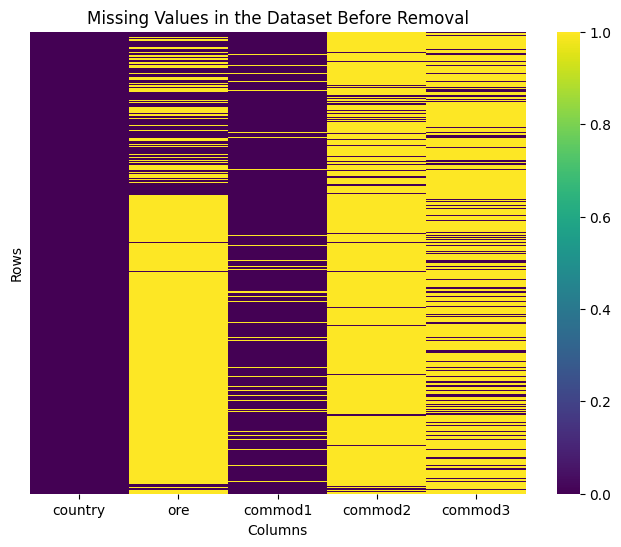

In [159]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=True, yticklabels=False)
plt.title('Missing Values in the Dataset Before Removal')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

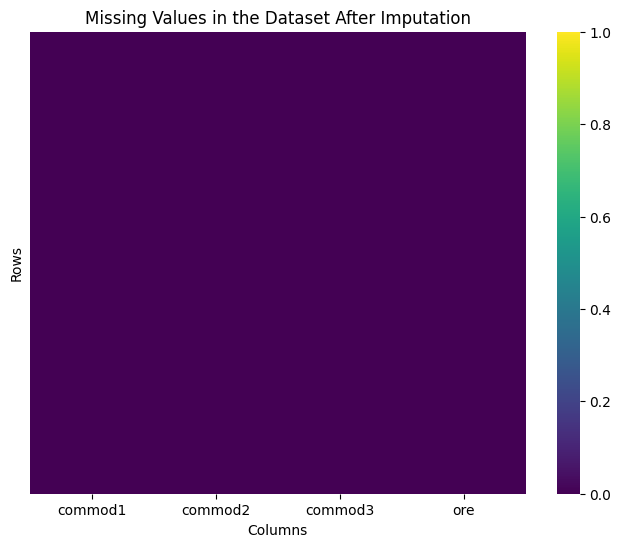

In [160]:
mineralsdf = pd.DataFrame()

mineralsdf[['commod1', 'commod2', 'commod3','ore']] = df[['commod1', 'commod2', 'commod3','ore']].fillna("NA")
plt.figure(figsize=(8, 6))
sns.heatmap(mineralsdf.isnull(), cmap='viridis', cbar=True, yticklabels=False, vmin=0, vmax=1)
plt.title('Missing Values in the Dataset After Imputation')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

I excluded any data from rows with a missing 'country' variable since that is what we need the most. For ore, commod1, commod2, and commod3, I replaced all missing values with NA. This would ensure that there are no missing values, and it would gived all the miss values a uniform value which I can replace later.

# Data Preprocessing


In [161]:
df['minerals'] = df['commod1'] + ', ' + df['commod2'] + ', ' + df['commod3'] + ', ' + df['ore']
df = df[['country', 'minerals']].explode('minerals')
df = df.dropna()
print(df.head())

          country                                           minerals
7   United States  Gold, Copper, Iron, Chalcopyrite, Magnetite, P...
8   United States                 Silver, Gold, Lead, Galena, Pyrite
22  United States  Copper, Gold, Iron, Chalcopyrite, Magnetite, P...
26  United States  Copper, Zinc, Silver, Gold, Molybdenum, Cobalt...
27  United States  Copper, Lead, Tungsten, Chalcopyrite, Galena, ...


I merged the three variables containing ore information into a single column called 'minerals'.

In [162]:
df['minerals'] = df['minerals'].str.split(', ')
df = df.explode('minerals')
df = df.drop_duplicates(subset=['country', 'minerals'])
df = df.dropna()
print(df.head())

         country      minerals
7  United States          Gold
7  United States        Copper
7  United States          Iron
7  United States  Chalcopyrite
7  United States     Magnetite


Then, I separated each mineral based on the placement of their commas. Each country may have several rows.

# Data Visualizations

<ipython-input-163-12837e6e7646>:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


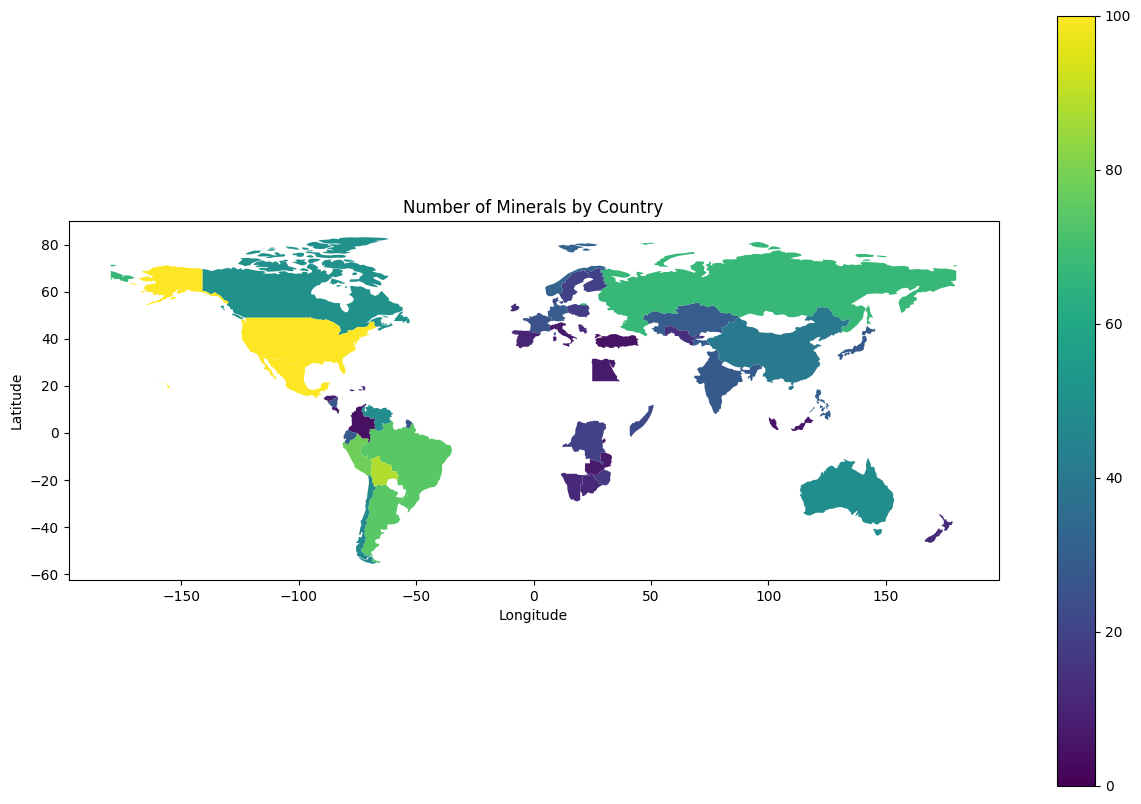

In [163]:
corrections = {
    'congo (kinshasa)': 'dem. rep. congo',
    'tanzania': 'united republic of tanzania',
    'dem. rep. congo': 'democratic republic of the congo',
    'south africa': 'south africa republic',
    'czechia': 'czech republic',
    's. sudan': 'south sudan',
    'w. sahara': 'western sahara',
    'n. cyprus': 'northern cyprus',
    'central african rep.': 'central african republic',
    'eSwatini': 'eswatini',
    'palestine': 'state of palestine',
    'solomon is.': 'solomon islands',
    'north macedonia': 'republic of north macedonia',
    'bosnia and herz.': 'bosnia and herzegovina',
    'trinidad and tobago': 'trinidad & tobago',
    'somaliland': 'somalia',
    'United States': 'United States of America',
    'Congo (Kinshasa)': 'Dem. Rep. Congo',
    'South Africa': 'South Africa Republic',
}

df['country'] = df['country'].replace(corrections)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
minerals_count = df['country'].value_counts().reset_index()
minerals_count.columns = ['country', 'mineral_count']
world = world.merge(minerals_count, how='left', left_on='name', right_on='country')

world.plot(column='mineral_count', cmap='viridis', figsize=(15, 10), legend=True, vmin=0, vmax=100)
plt.title('Number of Minerals by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Here, we can see a world map and its minerals. We can see that in terms of frequency, America produces the most minerals.

<ipython-input-164-2f095eed1f96>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mineral_count', y='country', data=minerals_count, palette='viridis')


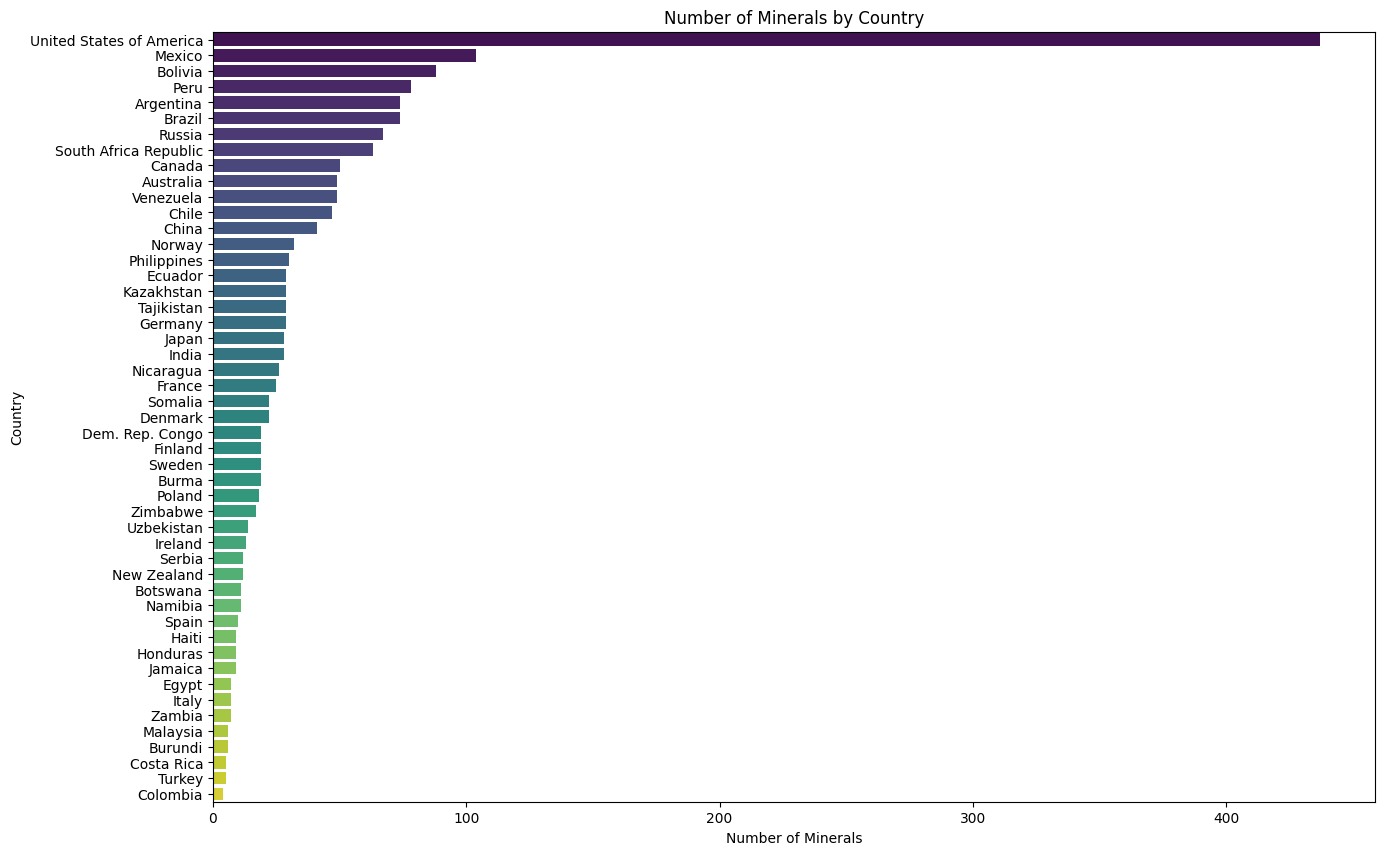

In [164]:
minerals_count = df['country'].value_counts().reset_index()
minerals_count.columns = ['country', 'mineral_count']
minerals_count = minerals_count.sort_values(by='mineral_count', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='mineral_count', y='country', data=minerals_count, palette='viridis')
plt.xlabel('Number of Minerals')
plt.ylabel('Country')
plt.title('Number of Minerals by Country')
plt.show()

This is another way to depict the frequency of minerals per country.

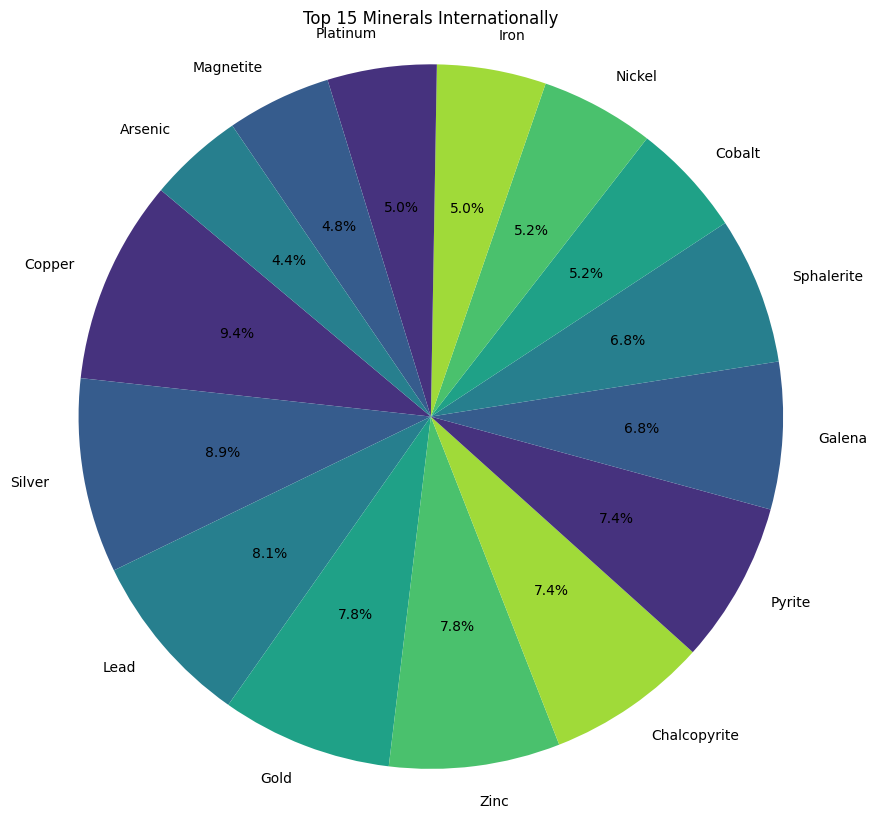

In [165]:
minerals_pivot = df['minerals'].str.get_dummies(', ').groupby(level=0).sum()

top_15_minerals = minerals_pivot.sum().nlargest(15)
plt.figure(figsize=(10, 10))
sns.set_palette('viridis')
plt.pie(top_15_minerals, labels=top_15_minerals.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Minerals Internationally')
plt.axis('equal')
plt.show()

With this pie chart, we see that Copper, followed by Silve and Lead, is the most common mineral internationally.  

<ipython-input-166-4cc00ce87752>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_minerals.values, y=top_3_minerals.index, palette='viridis')


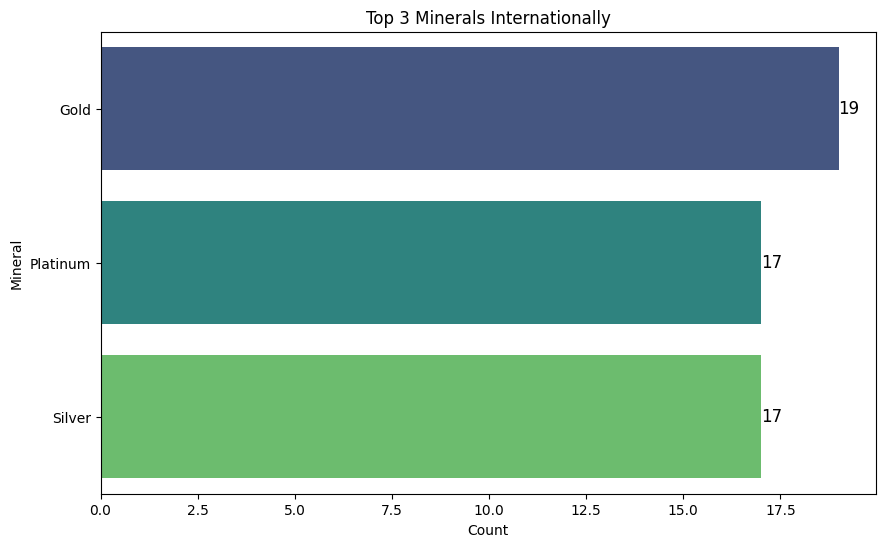

In [166]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_minerals.values, y=top_3_minerals.index, palette='viridis')
for index, value in enumerate(top_3_minerals.values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=12, color='black')

plt.xlabel('Count')
plt.ylabel('Mineral')
plt.title('Top 3 Minerals Internationally')
plt.show()

In [171]:
USrelations = {
    "Chile": "Neutral",
    "South Africa": "Ally",
    "Finland": "Ally",
    "Mexico": "Neutral",
    "Indonesia": "Ally",
    "Norway": "Ally",
    "Canada": "Ally",
    "Russia": "Competitor",
    "Japan": "Ally",
    "Philippines": "Neutral",
    "Peru": "Neutral",
    "Cuba": "Competitor",
    "Australia": "Ally",
    "Burma": "Neutral",
    "Portugal": "Ally",
    "Sweden": "Ally",
    "China": "Competitor",
    "Mauritania": "Neutral",
    "Brazil": "Neutral",
    "Argentina": "Neutral",
    "Germany": "Ally",
    "Namibia": "Neutral",
    "Zambia": "Neutral",
    "India": "Neutral",
    "Poland": "Ally",
    "Democratic Republic of Congo": "Neutral",
    "Vietnam": "Neutral",
    "Papua New Guinea": "Neutral",
    "Honduras": "Neutral",
    "United States of America": "Ally"
}

common_countries = set(USrelations.keys()) & set(df_countries)
all_countries = set(USrelations.keys()) | set(df_countries)
for country in all_countries:
    if country not in common_countries:
        alliance_mapping[country] = "Neutral"

print("Country | Alliance")
for country, alliance in USrelations.items():
    print(country, "|", alliance)

Country | Alliance
Chile | Neutral
South Africa | Ally
Finland | Ally
Mexico | Neutral
Indonesia | Ally
Norway | Ally
Canada | Ally
Russia | Competitor
Japan | Ally
Philippines | Neutral
Peru | Neutral
Cuba | Competitor
Australia | Ally
Burma | Neutral
Portugal | Ally
Sweden | Ally
China | Competitor
Mauritania | Neutral
Brazil | Neutral
Argentina | Neutral
Germany | Ally
Namibia | Neutral
Zambia | Neutral
India | Neutral
Poland | Ally
Democratic Republic of Congo | Neutral
Vietnam | Neutral
Papua New Guinea | Neutral
Honduras | Neutral
United States of America | Ally


I imputation alliance data as based on the wiki page here: https://en.wikipedia.org/wiki/Foreign_relations_of_the_United_States.

<ipython-input-172-9e44cb4d499c>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


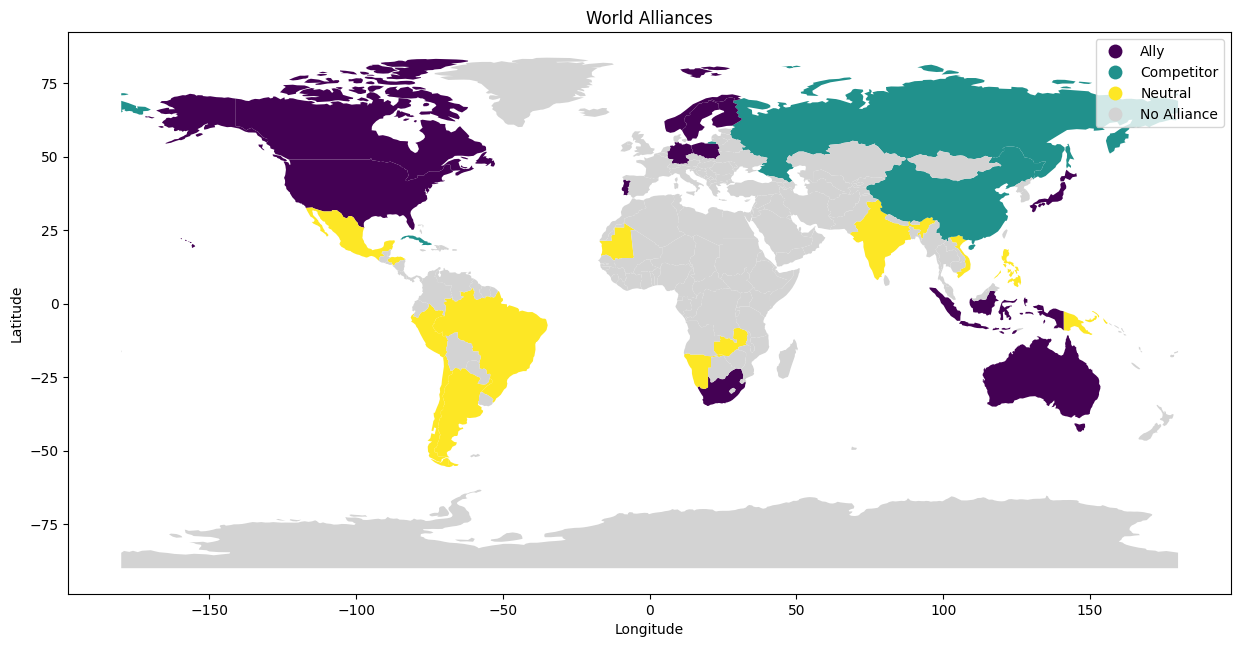

In [172]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(pd.DataFrame(list (USrelations.items()), columns=['country', 'alliance']), how='left', left_on='name', right_on='country')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='alliance', ax=ax, legend=True, cmap='viridis', missing_kwds={'color': 'lightgrey', 'label': 'No Alliance'})
plt.title('World Alliances')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


This world map gives us information on US alliances. I would argue that neutral parties are also an alliance!

In [169]:
df = df.merge(world[['name', 'alliance']], how='left', left_on='country', right_on='name')
df = df[['country', 'minerals', 'alliance']]
print(df.head())


                    country      minerals alliance
0  United States of America          Gold      NaN
1  United States of America        Copper      NaN
2  United States of America          Iron      NaN
3  United States of America  Chalcopyrite      NaN
4  United States of America     Magnetite      NaN


I merged the alliance data to the df.

<ipython-input-173-1aab1e53e925>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mineral_count', y='country', data=minerals_count, palette=custom_palette)


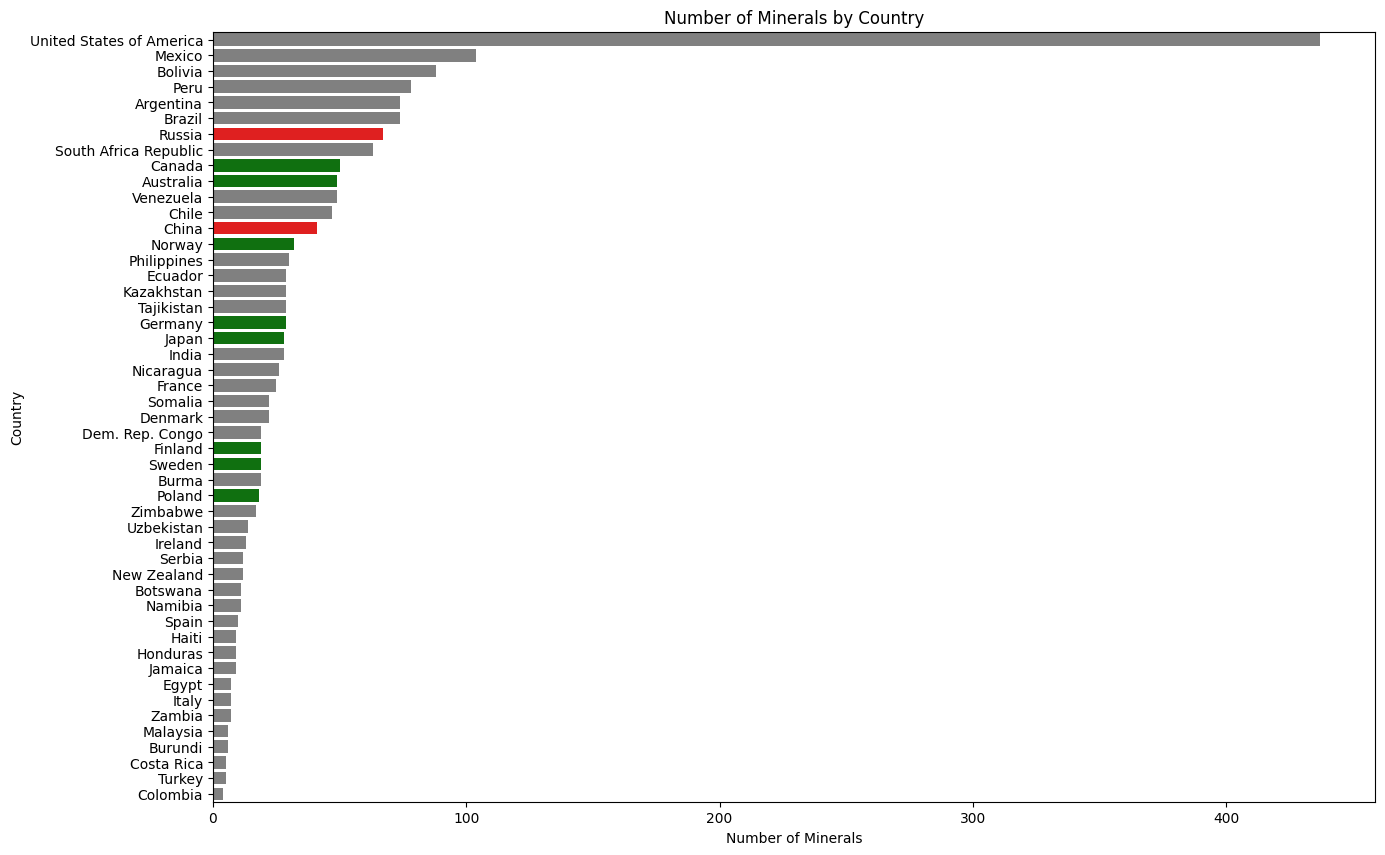

In [173]:
custom_palette = {country: colors.get(alliance, 'gray') for country, alliance in zip(df['country'], df['alliance'])}
plt.figure(figsize=(15, 10))
sns.barplot(x='mineral_count', y='country', data=minerals_count, palette=custom_palette)

plt.xlabel('Number of Minerals')
plt.ylabel('Country')
plt.title('Number of Minerals by Country')
plt.show()

I then displayed the geographical data in the form of a bar grahp once again.

# Conclusions

This analysis of global mineral resources highlights a  dependency on various countries, with the United States emerging as a primary producer, particularly in collaboration with allied nations like Canada, Norway, and Australia. However, there is notable reliance on competitors such as Russia and China for crucial minerals, which could be impacted further in times of tension or economic crises. Visualizations underscore the dominance of certain minerals like Copper, Silver, and Lead. With these visuals, we can better understand US alliances and the interconnectedness of geopolitics and resource availability.